In [ ]:
PCA
-> Is a widely used dimension reduction technique which reduces the dimension of our data.
-> It's the coordinate system based in terms of direction that captures the max variation in our data.
-> Finding the dominant combination of features that describe our data.
-> After PCA transformation, the features are linearly independent.

Algorithm:
1. Suppose we have n rows, where each rows shows contains measurements of single experiment 
2. Subtract the mean from each row, so center of distribution is at origin
3. Find the covariance of this mean centered data
4. Get eigenvectors and eigenvalues of the covariance matrix
5. Now, to find the Principal Component, subtract the data, we want to transform, from the mean and multiply with the eigenvectors.
6. Therefore, we decomposed the matrix into the direction of maximum variance where eigenvalues gives us amount of variance of the dataset 
7. If we want to see how much variance is being captured in the first r nodes  then divide the sum of variance captured by r nodes to the sum of variance given by all eigenvalues
8. So we can say principal components which can explain (95%, 96%, 99%) variance in the data.

In [158]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [159]:
class PCA:
  def __init__(self, n_components):
    self.n_components = n_components
    self.eigen_components = None
    self.mean = None
    self.variance_captured = {}

  def fit(self, X):
    self.mean = np.mean(X, axis =0) #column wise

    #mean
    X = X - self.mean

    #covariance
    cov= np.cov( X.T)

    #eigenvector, eigenvalue
    eigen_values, eigen_vector = np.linalg.eig(cov)

    eigen_vector = eigen_vector.T #coz we get eigen vector in column matrix

    #sorting to get the componenet which gives the variance in decreasing order
    index = np.argsort(eigen_values)[::-1]
    eigenvalues = eigen_values[index]
    eigenvector = eigen_vector[index]

    #getting the variance captures by our number of eigen value components
    self.variance_captured = {}
    for i in range(len(eigenvalues)):
      self.variance_captured[i] = np.sum(eigenvalues[:i])/np.sum(eigenvalues)

    #getting top n eigen components
    self.eigen_components = eigenvector[0:self.n_components] 


  def transform(self, X):
    X = X - self.mean
    pca_values = np.dot(X, self.eigen_components.T)
    return (pca_values, self.variance_captured[self.n_components])



In [160]:
dataset = datasets.load_iris()
X = dataset.data
Y = dataset.target

# change this 4 dimensional data to 2 dimension

In [161]:
n_components = 2
pca = PCA(n_components)
pca.fit(X)

pca_values, variance_captured = pca.transform(X)

print('Pca captured {} dimension from {} by {} components with variance {}'.format(pca_values.shape, X.shape, n_components, variance_captured ))

Pca captured (150, 2) dimension from (150, 4) by 2 components with variance 0.9776852063187947


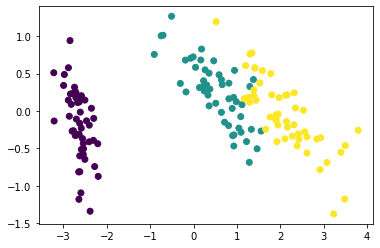

In [162]:
plt.scatter(pca_values[:,0],pca_values[:,1], c=Y)
